# Predicting Video Game Ownership Based on Game and Publisher Attributes
C. C. Stepien 

## Project Outline
### The Problem

In direct contrast to most other industries, very little video game sales and ownership data is publicly available. This makes video game market research, positioning and sales work extremely challenging. It is especially hard for small, 'indie' game studios because they frequently don't have the $50-100k to shell out for market research that larger publishers might be better equipped to take on. As Director of Marketing for one such small independent studio, I am personally interested in better forecasting tools for predicting video game ownership.

To address this knowledge gap, Sergey Galyonkin developed and published SteamSpy in 2015 using an algorithm to predict the number of owners for each video game on the game store Steam using publically available data from the site's APIs. SteamSpy is heavily relied on by the industry for market research and game development for one-person shops and major publishers alike. However, Steam's parent company Valve changed the Steam Web and Store APIs in early April 2018 so that the games a user owns are no longer publically available data. While SteamSpy has updated their prediction model and is still live, it is unknown how much longer enough data will be available to estimate game ownership for the industry. Moreso, while SteamSpy is a fantastic resource, leveraging this resource to make predictions for upcoming games is left to the individual researcher. 

### Goals and Deliverables

**Description of relationship between owners and game attributes of published games**: use ownership estimates from SteamSpy to investigate the correlation between number of owners and number of reviews, game genre, studio size, game price, and other data. How does the distribution of ratings impact overall sales? Number of negative vs posivite reviews?

**Prediction of future ownership rates based on game attributes for unpublished games**: predict the estimated number of owners for a not-yet released game based on the game's attributes, using a model trained from a subset of the SteamSpy dataset.

**Production of a forecasting tool to support game developers**: use the model trained on SteamSpy data to create a tool that allows game developers to input their game project's attributes to produce an estimation of the number of owners they might expect when they release their game. 

### The Data

I downloaded the full list of games and game details (about 17,000 games) for which there are owner estimations. In addition to number of owners, there is a suite of data on the studio, publisher, genre, tags (user-selected labels) and pricing.

While the lack of published games data makes it challenging to verify the accuracy of the SteamSpy algorithm, what little sales data has been published indicates that SteamSpy is quite accurate.

Currently I have only 1 time point for game sales data. I'll have to take into account the year the game was published and apply an adjustment to the ownership and review data. This can be explored by first looking at the number of reviews as a function of time since the game was published to see how reviews accrue over time for each cohort.  SteamSpy also has archived time point data, and I plan to reach out regarding additional time points after looking through initial results with a single time point.

## Initial Results

In [3]:
# Import packages

import numpy as np
from pandas.io.json import json_normalize
import pandas as pd
import matplotlib.pyplot as plt
import json

# Load initial json data file and get type

games = json.load(open('js_game_details.json'))
#print(games[0])
#print('games is a ' + str(type(games)))
#print('An entry in games is a ' + str(type(games[0])))

In [8]:
# Test json_normalize function on single entry 
# This function can take dict or list of dicts
# We have a list of dicts

dota2 = pd.DataFrame.from_dict(json_normalize(games[0]))
print(dota2)

   appid  average_2weeks  average_forever     ccu developer  median_2weeks  \
0    570            1091            11997  624694     Valve            570   

   median_forever    name  negative     owners    ...      tags.PvP  tags.RPG  \
0             257  Dota 2    111076  121766948    ...          3031      2332   

   tags.RTS  tags.Replay Value  tags.Simulation  tags.Strategy  \
0      2482               1645             1157           7940   

  tags.Team-Based tags.Tower Defense  tags.e-sports  userscore  
0            5305               2220           4542         87  

[1 rows x 40 columns]


In [9]:
# Convert the entire json file to a pandas dataframe

games_df = pd.DataFrame.from_dict(json_normalize(games))

In [14]:
games_df.columns

Index(['appid', 'average_2weeks', 'average_forever', 'ccu', 'developer',
       'median_2weeks', 'median_forever', 'name', 'negative', 'owners',
       ...
       'tags.Web Publishing', 'tags.Werewolves', 'tags.Western',
       'tags.Word Game', 'tags.World War I', 'tags.World War II',
       'tags.Wrestling', 'tags.Zombies', 'tags.e-sports', 'userscore'],
      dtype='object', length=361)

In [6]:
# Look over some entries in the dataframe

# games_df.iloc[0]

Text(0.5,1,'Number of owners based on number of reviews')

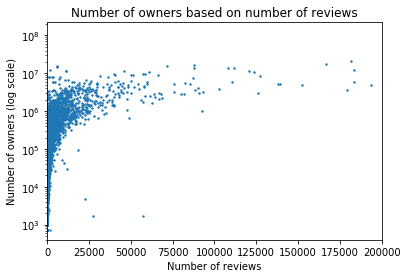

In [45]:
# Number of owners as a function of number of reviews
import matplotlib.pyplot as plt
%matplotlib inline

games_df['reviews'] = games_df['positive'] + games_df['negative']

plt.scatter(games_df.reviews, games_df.owners, s = 2)
plt.xlim((0, 200000))
plt.yscale('log')
plt.xlabel('Number of reviews')
plt.ylabel('Number of owners (log scale)')
plt.title('Number of owners based on number of reviews')

Text(0.5,1,'Number of owners based on number of reviews')

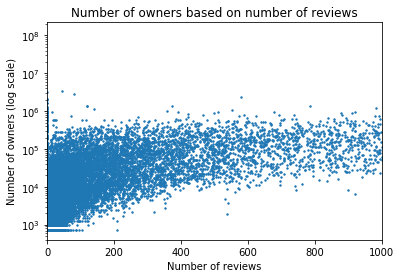

In [79]:
# Number of owners as a function of number of reviews
import matplotlib.pyplot as plt
%matplotlib inline

games_df['reviews'] = games_df['positive'] + games_df['negative']

plt.scatter(games_df.reviews, games_df.owners, s = 2)
plt.xlim((0, 1000))
plt.yscale('log')
plt.xlabel('Number of reviews')
plt.ylabel('Number of owners (log scale)')
plt.title('Number of owners based on number of reviews')

Text(0.5,1,'Number of owners based on % of reviews that are negative')

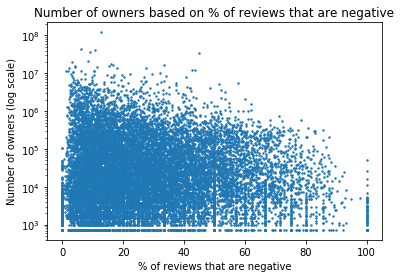

In [28]:
# Number of owners as a function of % negative reviews

games_df['negative_prop'] = 100*games_df['negative']/games_df['reviews']
plt.scatter(games_df.negative_prop, games_df.owners, s = 2)
plt.yscale('log')
plt.xlabel('% of reviews that are negative')
plt.ylabel('Number of owners (log scale)')
plt.title('Number of owners based on % of reviews that are negative')

Text(0.5,1,'Number of owners based on % of reviews that are positive')

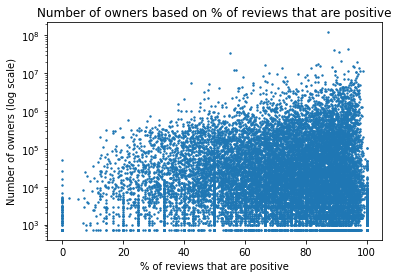

In [29]:
# Number of owners as a function of % positive reviews

games_df['positive_prop'] = 100*games_df['positive']/games_df['reviews']
plt.scatter(games_df.positive_prop, games_df.owners, s = 2)
plt.yscale('log')
plt.xlabel('% of reviews that are positive')
plt.ylabel('Number of owners (log scale)')
plt.title('Number of owners based on % of reviews that are positive')

(0, 50)

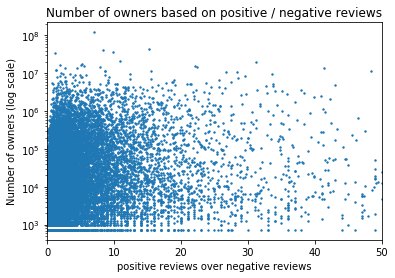

In [23]:
# Number of owners as a function of review ratio: positive to negative
games_df['pos_neg'] = games_df['positive']/games_df['negative']
plt.scatter(games_df.pos_neg, games_df.owners, s = 2)
plt.yscale('log')
plt.xlabel('positive reviews over negative reviews')
plt.ylabel('Number of owners (log scale)')
plt.title('Number of owners based on positive / negative reviews')
plt.xlim(0,50)

(0, 10)

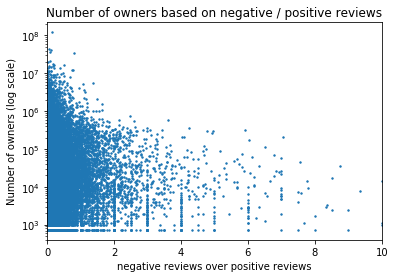

In [25]:
# Number of owners as a function of review ratio: negative to positivee
games_df['neg_pos'] = games_df['negative']/games_df['positive']
plt.scatter(games_df.neg_pos, games_df.owners, s = 2)
plt.yscale('log')
plt.xlabel('negative reviews over positive reviews')
plt.ylabel('Number of owners (log scale)')
plt.title('Number of owners based on negative / positive reviews')
plt.xlim((0, 10))

(0, 25000)

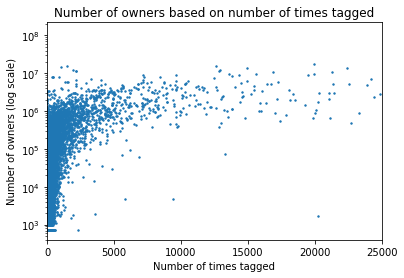

In [43]:
# Number of tags vs. owners
games_df['tags_total'] = games_df.filter(like = 'tags.').sum(axis=1)
plt.scatter(games_df.tags_total, games_df.owners, s = 2)
plt.yscale('log')
plt.xlabel('Number of times tagged')
plt.ylabel('Number of owners (log scale)')
plt.title('Number of owners based on number of times tagged')
plt.xlim((0, 25000))

(0, 40000)

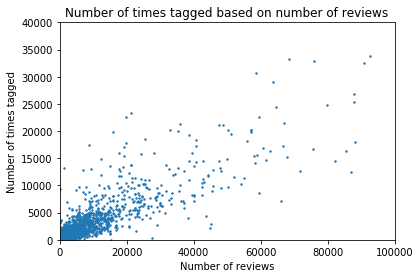

In [41]:
# Number of tags vs. number of reviews
plt.scatter(games_df.reviews, games_df.tags_total, s = 2)
plt.xlabel('Number of reviews')
plt.ylabel('Number of times tagged')
plt.title('Number of times tagged based on number of reviews')
plt.xlim(0,100000)
plt.ylim(0,40000)

In [111]:
games_df.loc[games_df['tags.Indie'] > 0]

,appid,average_2weeks,average_forever,ccu,developer,median_2weeks,median_forever,name,negative,owners,...,tags.e-sports,userscore,pos_neg,neg_pos,reviews,negative_prop,positive_prop,tags_total,top_tag,tag_count
3,304930,397,1334,13100,Smartly Dressed Games,65,152,Unturned,28217,35520957,...,NaN,90,9.859765,0.101422,306430,9.208302,90.791698,133572.0,tags.Free to Play,20
4,578080,1145,13861,1779700,PUBG Corporation,691,8640,PLAYERUNKNOWN'S BATTLEGROUNDS,322265,33414007,...,NaN,54,1.226447,0.815363,717506,44.914607,55.085393,39285.0,tags.Survival,20
8,227940,360,767,5221,RETO MOTO,50,51,Heroes & Generals,29361,17013343,...,NaN,66,1.994789,0.501306,87930,33.391334,66.608666,26755.0,tags.Free to Play,20
12,4000,538,6454,31821,Facepunch Studios,126,1033,Garry's Mod,14324,15003182,...,NaN,95,22.455878,0.044532,335982,4.263324,95.736676,110637.0,tags.Sandbox,20
14,301520,293,1084,2235,Freejam,61,131,Robocraft,29827,14122808,...,NaN,72,2.615047,0.382402,107826,27.662159,72.337841,22403.0,tags.Free to Play,20
27,105600,624,5136,20655,Re-Logic,133,1516,Terraria,6434,9862341,...,NaN,97,33.557041,0.029800,222340,2.893766,97.106234,72629.0,tags.Sandbox,20
30,238960,1363,4087,34477,Grinding Gear Games,333,254,Path of Exile,4392,9426908,...,NaN,92,12.390710,0.080706,58812,7.467864,92.532136,15620.0,tags.Free to Play,20
31,291550,271,897,7360,Blue Mammoth Games,57,132,Brawlhalla,9713,9188955,...,NaN,85,5.796355,0.172522,66013,14.713769,85.286231,7182.0,tags.Free to Play,20
33,224260,203,392,639,No More Room in Hell Team,37,74,No More Room in Hell,5309,9109476,...,NaN,89,8.624035,0.115955,51094,10.390653,89.609347,19453.0,tags.Free to Play,20
35,273110,845,1029,1475,Nexon,69,43,Counter-Strike Nexon: Zombies,10785,8538975,...,NaN,65,1.939546,0.515585,31703,34.018863,65.981137,13842.0,tags.Free to Play,20


Text(0.5,1,'Number of owners vs. number of unique tags')

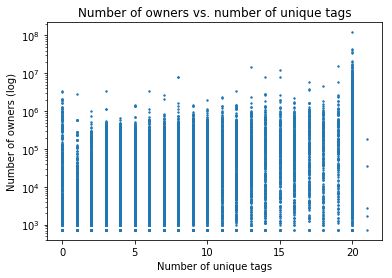

In [61]:
# Does number of unique tags influence owners, or vice versa?
games_df['tag_count'] = games_df.filter(like = 'tags.').apply(lambda x: x.count(), axis=1)
plt.scatter(games_df.tag_count, games_df.owners, s = 2)
plt.xlabel('Number of unique tags')
plt.yscale('log')
plt.ylabel('Number of owners (log)')
plt.title('Number of owners vs. number of unique tags')

Text(0.5,1,'Mean number of owners vs. number of unique tags')

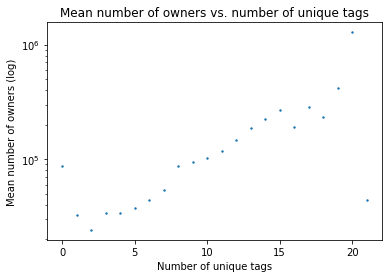

In [70]:
# Average owners per number of unique tags

owners_tag_count = games_df.groupby('tag_count').mean()
owners_tag_count['tag_count'] = owners_tag_count.index
plt.scatter(owners_tag_count.tag_count, owners_tag_count.owners, s = 2)
plt.xlabel('Number of unique tags')
plt.yscale('log')
plt.ylabel('Mean number of owners (log)')
plt.title('Mean number of owners vs. number of unique tags')

Text(0.5,1,'Median number of owners vs. number of unique tags')

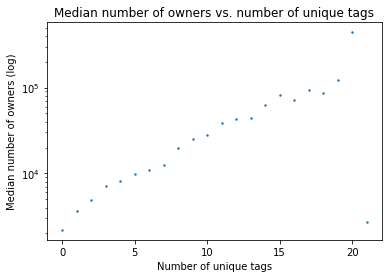

In [72]:
# Average owners per number of unique tags

med_owners_tag_count = games_df.groupby('tag_count').median()
med_owners_tag_count['tag_count'] = med_owners_tag_count.index
plt.scatter(med_owners_tag_count.tag_count, med_owners_tag_count.owners, s = 2)
plt.xlabel('Number of unique tags')
plt.yscale('log')
plt.ylabel('Median number of owners (log)')
plt.title('Median number of owners vs. number of unique tags')

In [83]:
# Take top tag for each game - more granular data than genre
games_df['top_tag'] = games_df.filter(like = 'tags.').idxmax(axis=1)
tag_freq = games_df['top_tag'].value_counts()

In [103]:
tag_freq = pd.DataFrame(tag_freq)
tag_freq

,top_tag
tags.Action,3285
tags.Indie,2195
tags.Adventure,1964
tags.Casual,1943
tags.Early Access,1583
tags.Strategy,1041
tags.Free to Play,941
tags.Simulation,683
tags.RPG,683
tags.Racing,306


In [93]:
common_tags = list(tag_freq.loc[tag_freq['top_tag'] > 100].index)

Text(0.5,1,'Number of owners based on number of reviews: Indie games only')

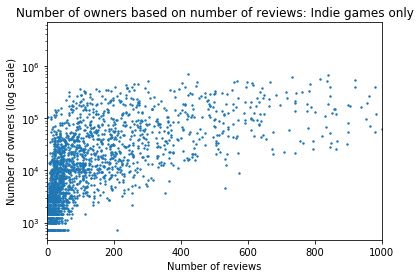

In [114]:
indie = games_df.loc[games_df['top_tag'] == 'tags.Indie']

plt.scatter(indie.reviews, indie.owners, s = 2)
plt.xlim((0, 1000))
plt.yscale('log')
plt.xlabel('Number of reviews')
plt.ylabel('Number of owners (log scale)')
plt.title('Number of owners based on number of reviews: Indie games only')

In [101]:
games_df['top_tag']

0                 tags.Free to Play
1                 tags.Free to Play
2                          tags.FPS
3                 tags.Free to Play
4                     tags.Survival
5                 tags.Free to Play
6                      tags.Zombies
7                 tags.Early Access
8                 tags.Free to Play
9                        tags.Co-op
10                         tags.FPS
11                      tags.Action
12                     tags.Sandbox
13                      tags.Action
14                tags.Free to Play
15                      tags.Action
16                tags.Free to Play
17       tags.Massively Multiplayer
18                    tags.Survival
19                  tags.Open World
20                      tags.Puzzle
21                      tags.Action
22                      tags.Action
23                      tags.Puzzle
24                         tags.FPS
25         tags.Turn-Based Strategy
26                  tags.Open World
27                     tags.

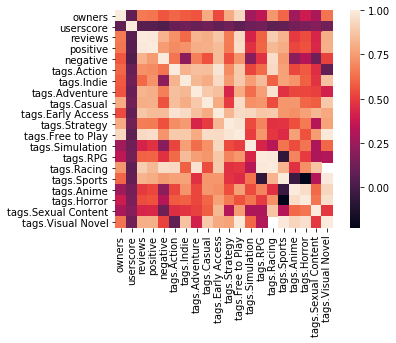

In [110]:
import seaborn as sns
explore = games_df[['owners','userscore','reviews','positive','negative', 
                    'tags.Action', 'tags.Indie','tags.Adventure','tags.Casual','tags.Early Access',
                    'tags.Strategy','tags.Free to Play','tags.Simulation','tags.RPG','tags.Racing',
                    'tags.Sports','tags.Anime','tags.Horror','tags.Sexual Content','tags.Visual Novel']] #Subsetting the data
cor = explore.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

In [113]:
games_df.loc[games_df['tags.Education'] > 0]

In [97]:
games_df.loc[games_df['tags.Programming'] > 0]

,appid,average_2weeks,average_forever,ccu,developer,median_2weeks,median_forever,name,negative,owners,...,tags.e-sports,userscore,pos_neg,neg_pos,reviews,negative_prop,positive_prop,tags_total,top_tag,tag_count
601,92800,128,377,43,Zachtronics,39,80,SpaceChem,308,1014223,...,NaN,96,11.477273,0.087129,3843,8.014572,91.985428,2047.0,tags.Puzzle,17
917,365450,123,284,67,Team Fractal Alligator,59,139,Hacknet,566,664365,...,NaN,93,14.305654,0.069902,8663,6.533533,93.466467,933.0,tags.Hacking,14
1055,220700,354,2373,307,KADOKAWA,60,172,RPG Maker VX Ace,209,585616,...,NaN,93,15.770335,0.063410,3505,5.962910,94.037090,1764.0,tags.Game Development,17
1617,370360,72,440,38,Zachtronics,54,114,TIS-100,72,351809,...,NaN,97,31.138889,0.032114,2314,3.111495,96.888505,458.0,tags.Programming,8
1619,400110,751,137,6,"Erik Svedäng, El Huervo / Niklas Åkerblad, Tob...",751,32,Else Heart.Break(),151,347908,...,NaN,84,1.980132,0.505017,450,33.555556,66.444444,311.0,tags.Adventure,12
1676,214850,1079,3717,201,YoYo Games Ltd.,313,54,GameMaker: Studio,284,333767,...,NaN,89,8.809859,0.113509,2786,10.193826,89.806174,896.0,tags.Game Development,12
1778,375820,145,292,22,Tomorrow Corporation,159,159,Human Resource Machine,126,307436,...,NaN,94,14.380952,0.069536,1938,6.501548,93.498452,386.0,tags.Programming,10
2006,300570,51,527,24,Zachtronics,57,244,Infinifactory,85,252337,...,NaN,94,15.658824,0.063862,1416,6.002825,93.997175,410.0,tags.Puzzle,12
2109,246070,0,131,1,Double Fine Productions,0,33,Hack 'n' Slash,330,254531,...,NaN,60,1.206061,0.829146,728,45.329670,54.670330,429.0,tags.Adventure,11
3639,504210,273,755,53,Zachtronics,67,315,SHENZHEN I/O,37,111418,...,NaN,96,34.729730,0.028794,1322,2.798790,97.201210,196.0,tags.Programming,6
